#### Importing Required Libraries

In [432]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [433]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from pandas_ml import ConfusionMatrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#### Loading Datasets with initial DataCleaning

In [434]:
df1=pd.read_excel("./SCM_AUG_SEP.xlsx",encoding='utf-8')
len(df1)

9505

In [435]:
df2=pd.read_excel("./FIN_AUG_SEP.xlsx",encoding='utf-8')
len(df2)

14360

In [436]:
df1=df1.dropna()
len(df1)

9159

In [437]:
df2=df2.dropna()
len(df2)

13617

In [438]:
#list_df=[df2,df1]

In [439]:
#FIN_SCM=pd.concat(list_df,axis=0)

In [440]:
FIN_SCM=pd.concat([df2,df1],ignore_index=True)

In [441]:
len(FIN_SCM)

22776

In [442]:
FIN_SCM.columns=FIN_SCM.columns.astype('str')

In [443]:
FIN_SCM=FIN_SCM.drop_duplicates().reset_index(drop=True)

In [503]:
len(FIN_SCM)

22626

In [14]:
print(sum(FIN_SCM['SR'].isna()))

0


In [15]:
print(sum(FIN_SCM['SR'].isnull()))

0


In [18]:
FIN_SCM=FIN_SCM.loc[FIN_SCM['SR'].dropna()]

In [19]:
len(FIN_SCM)

22776

In [445]:
FIN_SCM=FIN_SCM.dropna()

In [446]:
len(FIN_SCM)

22776

In [447]:
FIN_SCM.head(2)

,Bugged,Severity,Product Family,Product Area,Product ID,Product,Component,Sub Component,Product Version,Root Cause,SR,Known Issue,Reason Code,Summary,Status,Substatus,Last Updated On,Date Opened,Days Open,Date Closed
0,No,4-Minimal,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10405,Oracle Fusion General Ledger Cloud Service,Set Up FCR-Define Ledgers,Manage Accounting and Reporting Sequences,11.12.1.0.0,Cloud-Post Go Live,1,Unspecified,13 Documentation,Creation of account and account code combination,Closed,Resolved with Solution,2018-08-29 19:26:25,2018-08-22 07:01:15,7,2018-08-29 14:52:48
1,No,2-Significant,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10420,Oracle Fusion Payables Cloud Service,Manage Invoices-Audit Invoices,Manage Payables Invoices,11.13.18.02.0,Cloud-Post Go Live,2,Yes,"14 Undetermined,Cust Abandoned",[IMPL SPT] An application error occurred on ed...,Closed,No fault found,2018-08-24 18:38:19,2018-08-10 08:46:14,7,2018-08-17 16:29:01


In [448]:
FIN_SCM.columns=FIN_SCM.columns.map(lambda x : x.replace(' ','_'))

In [449]:
FIN_SCM.head(2)

,Bugged,Severity,Product_Family,Product_Area,Product_ID,Product,Component,Sub_Component,Product_Version,Root_Cause,SR,Known_Issue,Reason_Code,Summary,Status,Substatus,Last_Updated_On,Date_Opened,Days_Open,Date_Closed
0,No,4-Minimal,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10405,Oracle Fusion General Ledger Cloud Service,Set Up FCR-Define Ledgers,Manage Accounting and Reporting Sequences,11.12.1.0.0,Cloud-Post Go Live,1,Unspecified,13 Documentation,Creation of account and account code combination,Closed,Resolved with Solution,2018-08-29 19:26:25,2018-08-22 07:01:15,7,2018-08-29 14:52:48
1,No,2-Significant,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10420,Oracle Fusion Payables Cloud Service,Manage Invoices-Audit Invoices,Manage Payables Invoices,11.13.18.02.0,Cloud-Post Go Live,2,Yes,"14 Undetermined,Cust Abandoned",[IMPL SPT] An application error occurred on ed...,Closed,No fault found,2018-08-24 18:38:19,2018-08-10 08:46:14,7,2018-08-17 16:29:01


In [450]:
FIN_SCM['Root_Cause'].value_counts()

Cloud-Implementation             14009
Cloud-Post Go Live                5514
Cloud-Provisioning                1402
Software-Maintain                  598
Cust Engmt - Customer/Partner      394
Cloud-Special Events               385
Software-Install                   322
Software-Upgrade                    68
Cust Engmt - Development            38
Cust Engmt - Support                30
Hardware                            10
3-18260575351                        1
3-18246699141                        1
3-18307149679                        1
SR Link                              1
3-17922331161                        1
3-18201600121                        1
Name: Root_Cause, dtype: int64

In [451]:
FIN_SCM=FIN_SCM.dropna()

In [504]:
len(FIN_SCM)

22626

In [452]:
FIN_SCM1=FIN_SCM

In [453]:
FIN_SCM2=FIN_SCM

In [454]:
FIN_SCM1.Summary=FIN_SCM1.Summary.apply(lambda x : str(x))

In [455]:
FIN_SCM1.Summary=FIN_SCM1.Summary.apply(lambda x : x.encode('ascii',errors='ignore').decode())

In [456]:
FIN_SCM1['Summary'].head(100)

0      Creation of account and account code combination
1     [IMPL SPT] An application error occurred on ed...
2     We can not do the drilldown from the defined f...
3     Remove the assigned balancing segment from a l...
4     Unable to activate AP Journal Entry Rule Set X...
5     "Cannot insert record more than once" on loadi...
6     How to create common Lookup under Common Looku...
7              Unable to use Smartview post R13 upgrade
8                  Cannot Open Journal Page (Error 504)
9     Single Consolidated payment for Multiple Busin...
10    How do we upload Fiscal Classifications to the...
11    Manage Data Access for Users - No Roles listed...
12                     Statements are not being emailed
13               Add DFF to Chart of Account Value Sets
14              Expense Report is not Ready for Payment
15    Load and Process BAI2 Format bank Statement fi...
16    AR Automatic Receipts are not getting generate...
17    [IMPL SPT] Cannot find out the privilege w

In [457]:
FIN_SCM1['Summary'].replace('',np.nan,inplace=True)

In [458]:
FIN_SCM1.dropna(subset=['Summary'],inplace=True)

In [459]:
len(FIN_SCM1)

22626

In [460]:
Special_Ch=['_','-','[',']',':',')','~','(','.',',','\"','\'','/','{','}','%','?','0','1','2','3','4','5','6','7','8','9','+','*','=']

In [461]:
def remove_ch(Special_Ch):
    for char in Special_Ch:
        FIN_SCM1['Summary']=FIN_SCM1['Summary'].apply(lambda x:x.replace(char,' '))

In [462]:
remove_ch(Special_Ch)

In [463]:
FIN_SCM1

,Bugged,Severity,Product_Family,Product_Area,Product_ID,Product,Component,Sub_Component,Product_Version,Root_Cause,SR,Known_Issue,Reason_Code,Summary,Status,Substatus,Last_Updated_On,Date_Opened,Days_Open,Date_Closed
0,No,4-Minimal,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10405,Oracle Fusion General Ledger Cloud Service,Set Up FCR-Define Ledgers,Manage Accounting and Reporting Sequences,11.12.1.0.0,Cloud-Post Go Live,1,Unspecified,13 Documentation,Creation of account and account code combination,Closed,Resolved with Solution,2018-08-29 19:26:25,2018-08-22 07:01:15,7,2018-08-29 14:52:48
1,No,2-Significant,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10420,Oracle Fusion Payables Cloud Service,Manage Invoices-Audit Invoices,Manage Payables Invoices,11.13.18.02.0,Cloud-Post Go Live,2,Yes,"14 Undetermined,Cust Abandoned",IMPL SPT An application error occurred on ed...,Closed,No fault found,2018-08-24 18:38:19,2018-08-10 08:46:14,7,2018-08-17 16:29:01
2,No,2-Significant,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10405,Oracle Fusion General Ledger Cloud Service,Financial Reporting and Analysis,Prepare Financial Reports,11.12.1.0.0,Cloud-Implementation,3,Yes,01 Product Defects,We can not do the drilldown from the defined f...,Closed,Resolved with Solution,2018-08-02 01:40:04,2018-07-25 16:15:11,7,2018-08-01 23:47:24
3,No,2-Significant,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10405,Oracle Fusion General Ledger Cloud Service,Set Up FCR-Define Ledgers,Manage Ledgers and Balancing Segment Value Ass...,11.13.18.02.0,Cloud-Post Go Live,4,Yes,07 Setup / Configuration,Remove the assigned balancing segment from a l...,Closed,Resolved with Workaround,2018-08-23 16:39:27,2018-08-09 06:18:46,7,2018-08-16 13:49:48
4,No,2-Significant,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10420,Oracle Fusion Payables Cloud Service,Manage Accounts Payable Balances-Close Payable...,Manage Payables Accounting Periods,11.13.18.02.0,Cloud-Post Go Live,5,No,07 Setup / Configuration,Unable to activate AP Journal Entry Rule Set X...,Closed,Resolved with Solution,2018-09-06 16:39:41,2018-08-23 07:46:37,7,2018-08-30 15:15:14
5,No,3-Standard,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10418,Oracle Fusion Receivables Cloud Service,Setup Module,UNSPECIFIED,11.13.18.02.0,Cloud-Post Go Live,6,Unspecified,01 Product Defects,Cannot insert record more than once on loadi...,Closed,Resolved with Workaround,2018-08-14 17:44:58,2018-07-31 07:19:34,7,2018-08-07 14:49:06
6,No,3-Standard,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10403,Oracle Fusion Financials Common Module Cloud S...,Functional Setup Manager,UNSPECIFIED,11.13.18.02.0,Cloud-Post Go Live,7,Yes,07 Setup / Configuration,How to create common Lookup under Common Looku...,Closed,Resolved with Solution,2018-09-05 02:31:52,2018-08-21 16:55:38,7,2018-08-29 00:16:36
7,No,2-Significant,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10405,Oracle Fusion General Ledger Cloud Service,Financial Reporting and Analysis,Prepare Financial Reports,11.13.18.02.0,Cloud-Post Go Live,8,Unspecified,07 Setup / Configuration,Unable to use Smartview post R upgrade,Closed,No fault found,2018-08-30 19:17:42,2018-08-23 07:33:12,7,2018-08-30 14:46:26
8,No,1-Critical,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10405,Oracle Fusion General Ledger Cloud Service,Create and Manage Journals,Manage Journals,11.13.18.02.0,Cloud-Implementation,9,Yes,"05 Performance, Sizing",Cannot Open Journal Page Error,Closed,No fault found,2018-08-23 13:40:13,2018-08-09 03:37:10,7,2018-08-16 10:49:54
9,No,2-Significant,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10420,Oracle Fusion Payables Cloud Service,Manage Payments-Prepare and Record Payments,Manage Payables Payments,11.13.18.02.0,Cloud-Post Go Live,10,No,02 Enhancement Requests,Single Consolidated payment for Multiple

In [464]:
SUMM_RC=FIN_SCM1[['Summary','Root_Cause']]

In [465]:
SUMM_RC.head(2)

,Summary,Root_Cause
0,Creation of account and account code combination,Cloud-Post Go Live
1,IMPL SPT An application error occurred on ed...,Cloud-Post Go Live


In [466]:
SUMM_RC1=SUMM_RC

In [467]:
SUMM_RC1['Root_Cause'].unique()

array(['Cloud-Post Go Live', 'Cloud-Implementation', 'Cloud-Provisioning',
       'Cloud-Special Events', 'Software-Maintain',
       'Cust Engmt - Customer/Partner', 'Software-Install',
       'Cust Engmt - Development', 'Software-Upgrade', 'Hardware',
       'Cust Engmt - Support', '3-17922331161', '3-18307149679',
       '3-18260575351', '3-18201600121', 'SR Link', '3-18246699141'],
      dtype=object)

In [468]:
SUMM_RC1=SUMM_RC1.loc[~SUMM_RC1['Root_Cause'].isin(['3-17922331161','3-18307149679','3-18260575351'])].reset_index(drop=True)

In [469]:
len(SUMM_RC1)

22623

In [470]:
SUMM_RC1.head(2)

,Summary,Root_Cause
0,Creation of account and account code combination,Cloud-Post Go Live
1,IMPL SPT An application error occurred on ed...,Cloud-Post Go Live


In [471]:
SUMM_RC2=SUMM_RC1

In [472]:
SUMM_RC2.Summary=SUMM_RC2.Summary.apply(lambda x:x.lower())

In [473]:
SUMM_RC2.head(2)

,Summary,Root_Cause
0,creation of account and account code combination,Cloud-Post Go Live
1,impl spt an application error occurred on ed...,Cloud-Post Go Live


#### Text Preprocessing

In [474]:
#stop_words=stopwords.words("english")


In [475]:
SUMM_RC2.Summary=SUMM_RC2.Summary.str.replace('\d+', '')

In [476]:
PS=PorterStemmer()
WL=WordNetLemmatizer()

In [477]:
def Preprocessing(doc,lemma=True):
    doc=doc.lower()
    doc_words=word_tokenize(doc)
    doc_words=[word for word in doc_words if word not in stopwords.words("english")]
    if lemma:
        doc_words=[WL.lemmatize(word,pos='v') for word in doc_words]
    else:
        doc_words=[PS.stem(word) for word in doc_words]
    doc=" ".join(doc_words)
    return doc

In [478]:
SUMM_RC2.Summary=SUMM_RC2.Summary.apply(lambda x :Preprocessing(x))

In [479]:
SUMM_RC2.head(2)

,Summary,Root_Cause
0,creation account account code combination,Cloud-Post Go Live
1,impl spt application error occur edit distribu...,Cloud-Post Go Live


In [480]:
SUMM_RC3=SUMM_RC2

In [481]:
SUMM_RC4=SUMM_RC2

#### Frequncy Word Distributions

In [325]:
word_dist=pd.DataFrame(pd.Series(" ".join(SUMM_RC3.Summary).split()).value_counts()).reset_index(drop=False)

In [1437]:
word_dist

,index,0
0,invoice,4365
1,impl,3484
2,spt,3447
3,error,3035
4,account,2792
5,report,2204
6,create,2075
7,unable,1806
8,expense,1438
9,import,1248


In [1359]:
word_dist=word_dist.rename(columns={'index':'Word',0:'Freq'})

In [1360]:
word_dist[:5]

,Word,Freq
0,invoice,4365
1,impl,3484
2,spt,3447
3,error,3035
4,account,2792


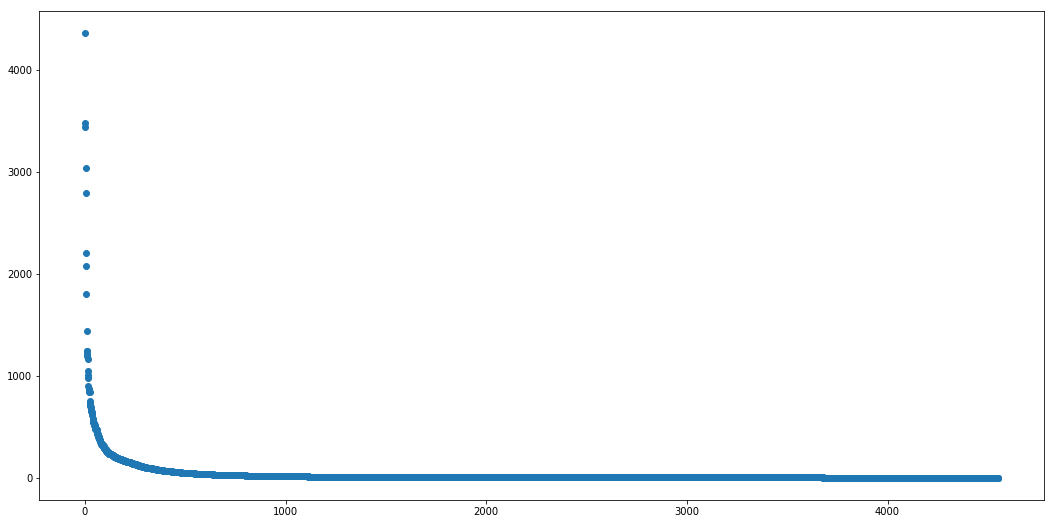

In [924]:
plt.figure(figsize=(18,9))
plt.scatter(x=word_dist.index,y=word_dist.Freq)

In [1361]:
print(len(word_dist[word_dist.Freq<2]))

885


In [926]:
word_L=word_dist[~word_dist.Freq.isin(['1'])]
word_L[-5:]

,Word,Freq
3673,serv,2
3674,multiplication,2
3675,eevi,2
3676,itau,2
3677,tranmission,2


In [927]:
word_U=word_L[~word_L.Freq.isin(word_L.Freq.iloc[:1])]

In [928]:
word_U[:5]

,Word,Freq
1,impl,3484
2,spt,3447
3,error,3035
4,account,2794
5,report,2204


In [929]:
list_words=list(word_dist.Word)
#list_words=list(word_dist.Word)

In [930]:
list_words[:5]

['invoice', 'impl', 'spt', 'error', 'account']

In [931]:
def rem_words(list1):
    for i in list1:
        if len(i)==1:
            list1.remove(i)
        #elif len(i)==2:
        #    list1.remove(i)
    return(list1)

In [932]:
list_words1=rem_words(list_words)

In [933]:
list_words1[-5:]

['mes', 'clarity', 'correctcustomerdata', 'population', 'runtimeexception']

In [934]:
list_words2=list_words1

In [935]:
def exclude_list1(txt):
    split_words=txt.split()
    final_words=[word for word in split_words if word in list_words2]
    result=' '.join(final_words)
    return(result)

In [936]:
SUMM_RC3.Summary=SUMM_RC3.Summary.apply(lambda x : exclude_list1(x))

In [937]:
SUMM_RC3.head(2)

,Summary,Root_Cause
0,impl spt application error occur edit distribu...,Cloud-Post Go Live
1,drilldown define financial report,Cloud-Implementation


In [1362]:
SUMM_RC4=SUMM_RC3

In [1363]:
SUMM_RC4

,Summary,Root_Cause
0,impl spt application error occur edit distribu...,Cloud-Post Go Live
1,drilldown define financial report,Cloud-Implementation
2,remove assign balance segment legal entity,Cloud-Post Go Live
3,unable activate ap journal entry rule set xla,Cloud-Post Go Live
4,insert record load nd receipt batch use spread...,Cloud-Post Go Live
5,create common lookup common lookups use setup ...,Cloud-Post Go Live
6,unable use smartview post r upgrade,Cloud-Post Go Live
7,open journal page error,Cloud-Implementation
8,single consolidate payment multiple business u...,Cloud-Post Go Live
9,upload fiscal classifications party tax profil...,Cloud-Post Go Live


#### Model building

In [482]:
X=SUMM_RC4["Summary"]
Y=SUMM_RC4["Root_Cause"]

In [483]:
from sklearn.model_selection import train_test_split

In [484]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=100)

In [485]:
X_train

17164                        unable get default price list
13581    import certificate external web service source...
18288    unable perform account alias transaction use r...
5008                     prod pdf file open fusion expense
21018                  approval notifications miss p clone
6823                       present problem tax calculation
20842    attribute usecurrentcostflag error invoke tran...
9994                email address automate invoice process
13228    impl spt distribution account populate invoice...
18400             account rule po distribution work expect
4135     foreign currency journal show wrong currency a...
11901                            bank statement bai upload
8536                  automatic bank statement file import
5538                                    allocation rule go
3219     unable change payable account method payment i...
7842                            ar reconciliation variance
15478    impl spt application error occur run load inte.

In [486]:
from sklearn.feature_extraction import text

In [487]:
tfidf=text.TfidfVectorizer(ngram_range=(1,3),stop_words="english")

In [488]:
X_tr=tfidf.fit_transform(X_train.tolist())

In [489]:
X_te=tfidf.transform(X_test.tolist())

In [490]:
from sklearn.preprocessing import LabelEncoder

In [491]:
#enc=LabelEncoder()

In [492]:
#Y_tr=enc.fit_transform(Y_train)

In [493]:
Y_tr=Y_train.values
Y_tr

array(['Cloud-Implementation', 'Cloud-Implementation',
       'Cloud-Implementation', ..., 'Cloud-Implementation',
       'Cloud-Implementation', 'Cloud-Special Events'], dtype=object)

In [494]:
#Y_te=enc.transform(Y_test)

In [495]:
Y_te=Y_test.values
Y_te

array(['Cloud-Implementation', 'Cloud-Post Go Live',
       'Cloud-Implementation', ..., 'Cloud-Post Go Live',
       'Cloud-Implementation', 'Cust Engmt - Support'], dtype=object)

In [496]:
from sklearn.linear_model import LogisticRegression

In [497]:
clf=LogisticRegression(multi_class="multinomial",penalty='l2',solver='lbfgs')

In [498]:
import sklearn.model_selection as ms

In [499]:
param_grid={'C': np.arange(0,1,0.1)}

In [406]:
mod=ms.GridSearchCV(clf,param_grid=param_grid,n_jobs=-1,verbose=10)

In [407]:
mod.fit(X_tr,Y_tr)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:  3.3min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  4.3min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  4.7min remaining:   31.2s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.9min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [408]:
mod.best_params_

{'C': 0.9}

In [409]:
mod.score(X_te,Y_te)

0.7020487460261392

In [1657]:
Y_pred=mod.predict(X_te)

In [1658]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_te,Y_pred)
cm

array([[3035,  195,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 670,  903,    3,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 304,   48,   34,    0,    0,    0,    0,    0,    0,    0,    0],
       [  86,   10,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  93,   10,    2,    0,    1,    0,    0,    0,    0,    0,    0],
       [  10,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  10,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   2,    2,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  82,    2,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 134,   18,    0,    0,    0,    0,    0,    0,    0,    2,    0],
       [   5,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int64)

In [66]:
from sklearn import naive_bayes,svm,metrics,ensemble

In [67]:
def train_model(classifier,feature_vector_train,label,feature_vector_valid):
    classifier.fit(feature_vector_train,label)
    predictions=classifier.predict(feature_vector_valid)
    return metrics.accuracy_score(predictions,Y_te)

In [68]:
nb=train_model(naive_bayes.MultinomialNB(),X_tr,Y_tr,X_te)

NameError: name 'X_tr' is not defined

In [69]:
print(nb)

NameError: name 'nb' is not defined

#### Training the Data with RandomForest Model

In [500]:
def train_model(classifier,feature_vector_train,label,feature_vector_valid):
    classifier.fit(feature_vector_train,label)
    predictions=classifier.predict(feature_vector_valid)
    return metrics.accuracy_score(predictions,Y_te)

In [501]:
RF=train_model(ensemble.RandomForestClassifier(150),X_tr,Y_tr,X_te)

In [502]:
RF

0.6412659123055162

#### Training with SVM Model

In [1675]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_tr, Y_tr)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [1677]:
Y_pr = classifier.predict(X_te)

In [1678]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_te, Y_pr)
cm

array([[3230,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1576,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 386,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  96,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 106,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  11,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  10,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   4,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  84,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 154,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   5,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int64)

In [1679]:
ac=accuracy_score(Y_te,Y_pr)
ac

0.5704697986577181

In [344]:
x_train, x_test, y_train, y_test = train_test_split(SUMM_RC4.Summary, SUMM_RC4.Root_Cause,test_size=0.25,random_state=100)

In [345]:
vect = CountVectorizer(ngram_range=(1,3))
#vect =text.CountVectorizer(ngram_range=(1,3),stop_words="english",max_features=80000)

In [346]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [347]:
X_train = vect.fit_transform(x_train)
X_test = vect.transform(x_test)

In [348]:
mnb = MultinomialNB(0.3)
mnb.fit(X_train,y_train)
result= mnb.predict(X_test)

In [349]:
result

array(['Cloud-Post Go Live', 'Cloud-Implementation', 'Cloud-Post Go Live',
       ..., 'Cloud-Post Go Live', 'Cloud-Implementation',
       'Cloud-Implementation'], dtype='<U29')

In [350]:
accuracy_score(result,y_test)

0.7832921229247616